
Pranaov Giridharan
6/18

# "Does living in certain parts of the world correlate to certain levels of happiness?"


## One of the most sought after questions of this decade by many is if living in a certain part of the world correlate to certain levels of happiness. some people argue that every country/region has their own unique set of problems that they are forced to deal with, which on the happiness scale puts them evenly against any other country in the world. while some argue that living in certain countries/regions are undoubtedly more peaceful and the residents tend to be generally be happier than their counterparts worldwide. this project delves a bit more into this concept of happiness and geographical location.

Background: The dataset that will be used for this study is sourced from Kaggle, called "World Happiness Report". For this study I will mostly be using regression analysis to conclude if living in certain parts of the world correlates to certain levels of happiness or if geography has nothing to do with happiness. We will assume that none of the respondents throughout the world are going through any sort of nationwide calamity such as war or any sort of natural disaster[1]. We will also assume that none of the respondents responded more than once. A bias in the study could be that respondents weren’t being completely honest while responding to the survey, or felt like they needed to provide a “normal” answer. Some limitations of the model would be that the survey doesn’t account for any sort of national calamity or disaster in previous years that might bring the happiness scores down. I suspect that this model might overlook anything country specific that affects the happiness scores of the residents. Based on my reflections above, I will do some of my own research and try to find out if there's any other factors that affect the happiness scores.


## Methodology


To analyze the dataset "World Happiness Report" from kaggle, it was first imported to this file and read into a pandas dataframe.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

datapath = '2017.csv'
data = pd.read_csv(datapath)
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


the header of the dataset we will be using for this is shown above. the dataset includes features such as country names, Happiness scores, GDP per capita, life expectancy, Freedom scores, Generosity scores, Government corruption scores and dystopia Residuals


the format of the data is presented below. 

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

 all of our columns are already in usable conditions in wither int64 or float64 format, which makes the dataset easy to work with.

 The code below plots the countries and it's corresponding happiness score on a bar chart in seaborn.

/var/folders/hl/s7kdln6n79j038vk783s5j8w0000gn/T/ipykernel_13599/4122261263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness.Score',y='Country',data=data_sorted,palette='viridis')


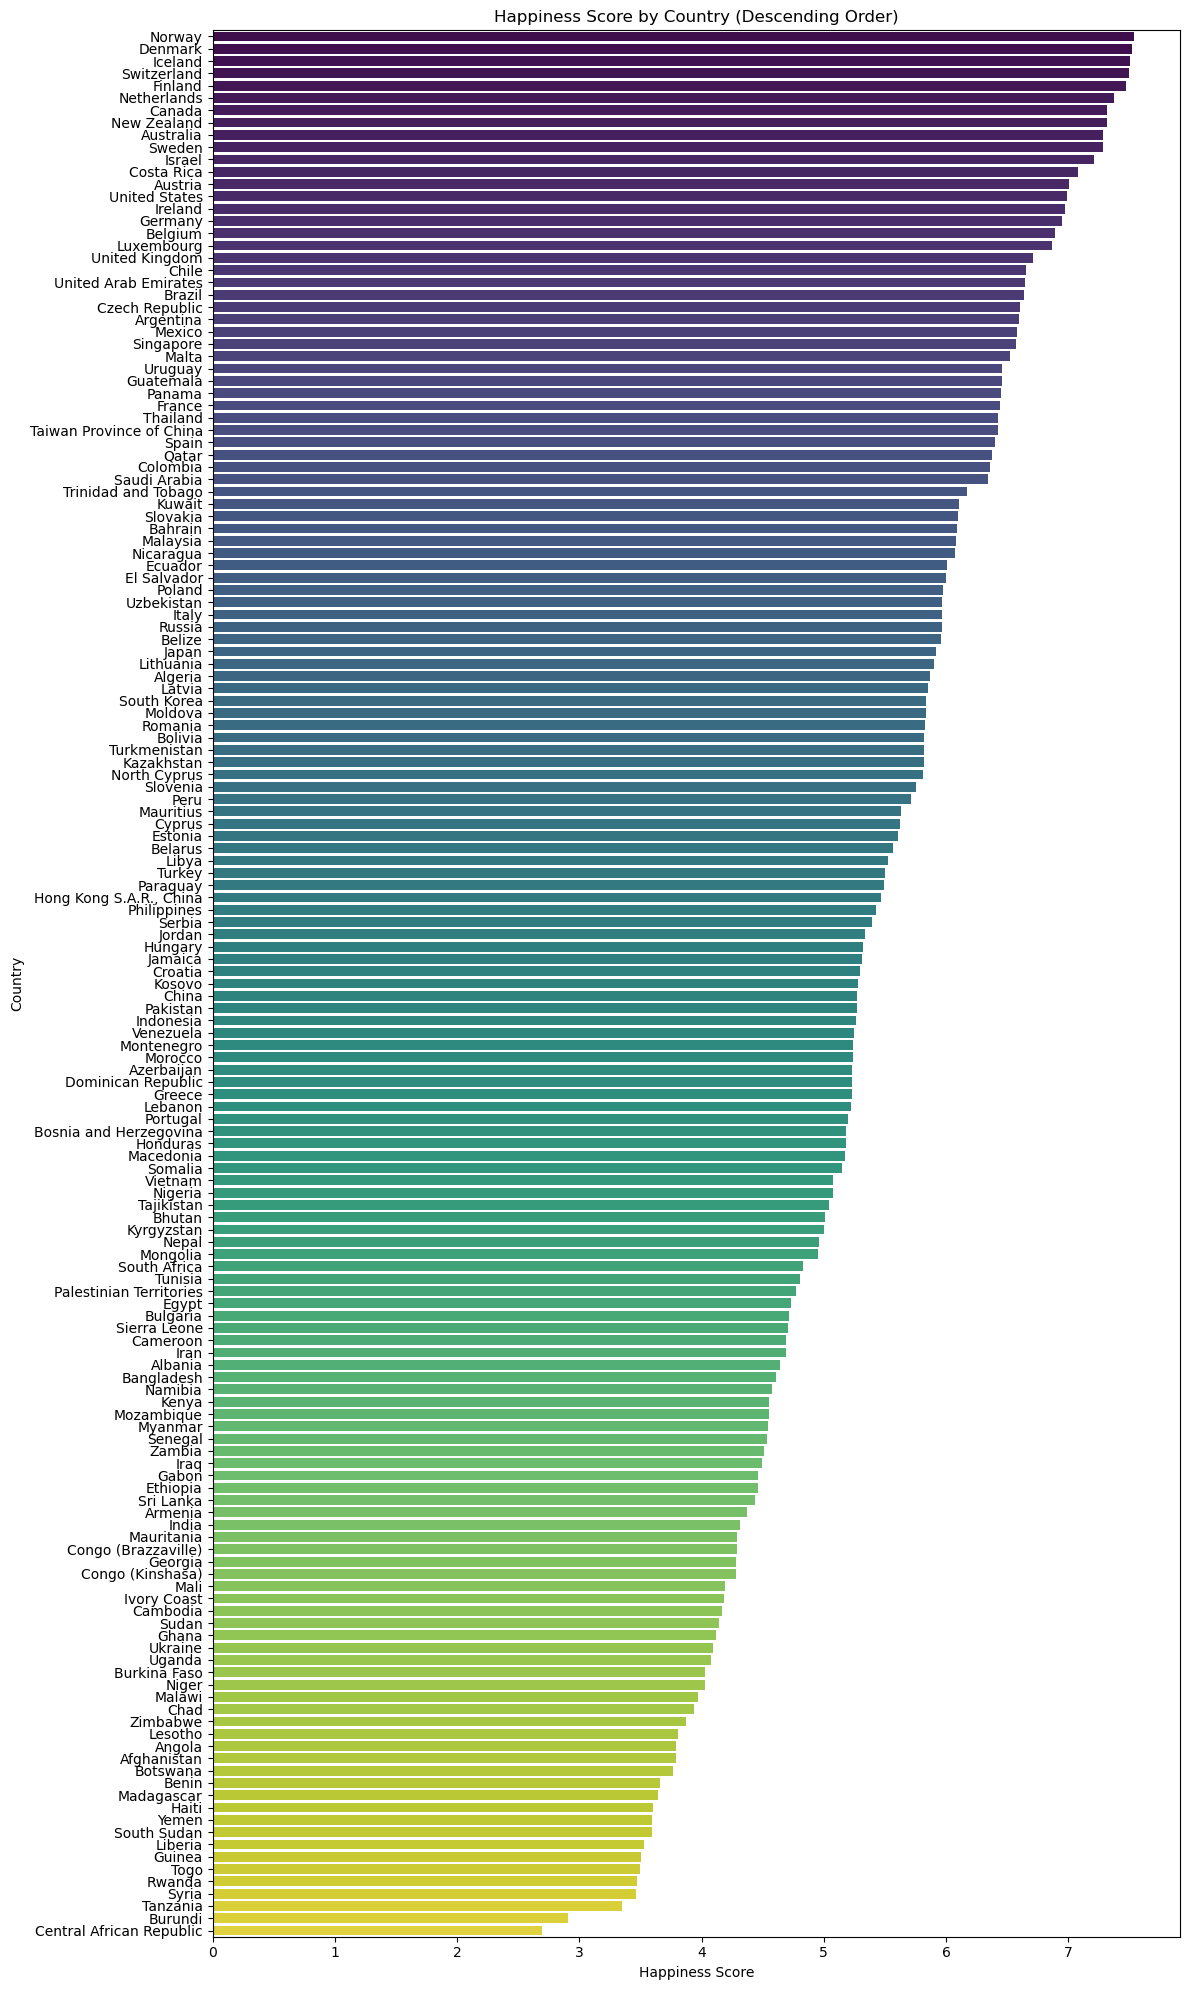

In [6]:
import seaborn as sns
data_sorted = data.sort_values(by='Happiness.Score', ascending=False)
plt.figure(figsize=(12, 20))

sns.barplot(x='Happiness.Score',y='Country',data=data_sorted,palette='viridis')

plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country (Descending Order)')
plt.tight_layout()

plt.show()

It is important to note that a fair chunk of the countries at the top are european countries, while the ones at the bottom are mostly african countries.

The code below is utilizing the matplotlibrary's scatterplot feature to plot the HS (Happiness Scores) vs Gdp per capita in the top and bottom 30 countries to find any correlation between the two variables

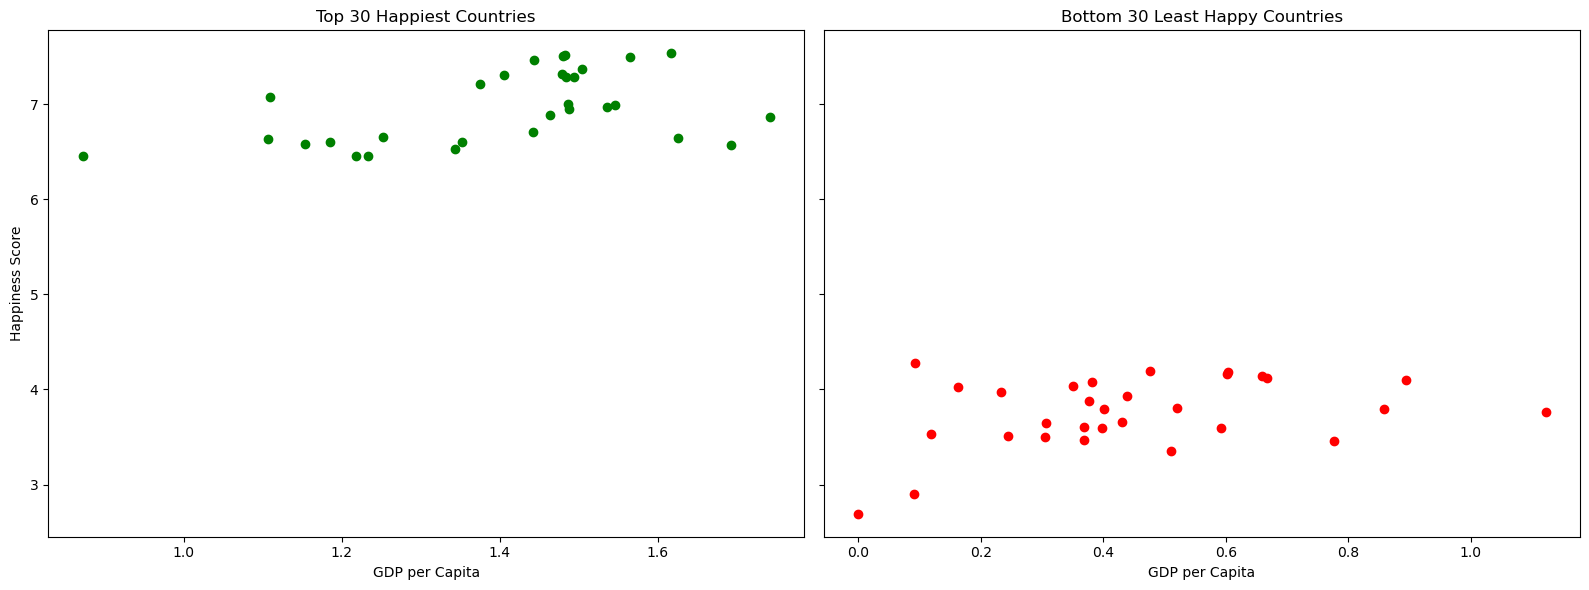

In [7]:
top_30 = data_sorted.head(30)
bottom_30 = data_sorted.tail(30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Economy..GDP.per.Capita.'], top_30['Happiness.Score'], color='green')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('GDP per Capita')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Economy..GDP.per.Capita.'], bottom_30['Happiness.Score'], color='red')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('GDP per Capita')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()

As shown in the chart above, there seems to be a pretty obvious trend in the gdp vs HS in both the top and bottom 30 countries[3]. it is interesting to note, however, that a couple of countries in top 30 HS has a lower gdp than one country in bottom 30 HS, yet they all have a significantly greater HS. this could just be an outlier, but still important to note.

the code below visualizes more HS vs other variables such as Freedom, Generosity, Government corruption and life expectancy using scatterplots to spot any correlations between the data.

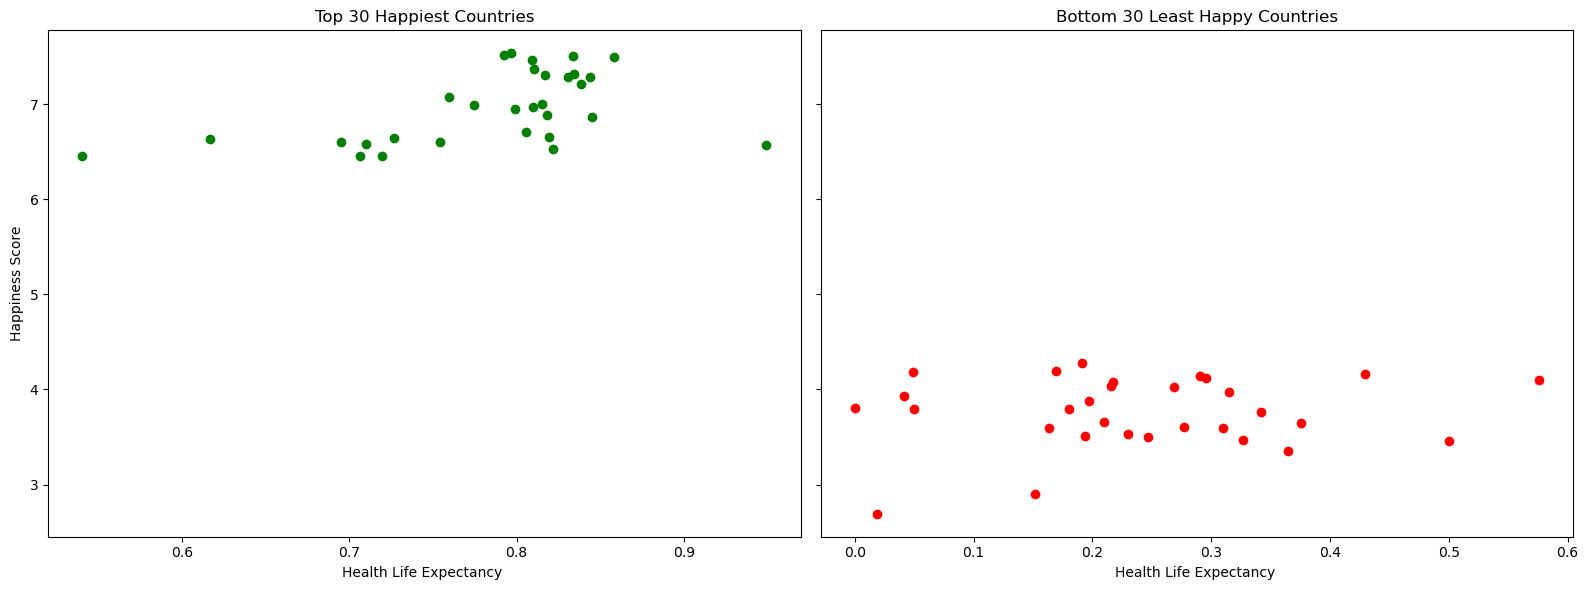

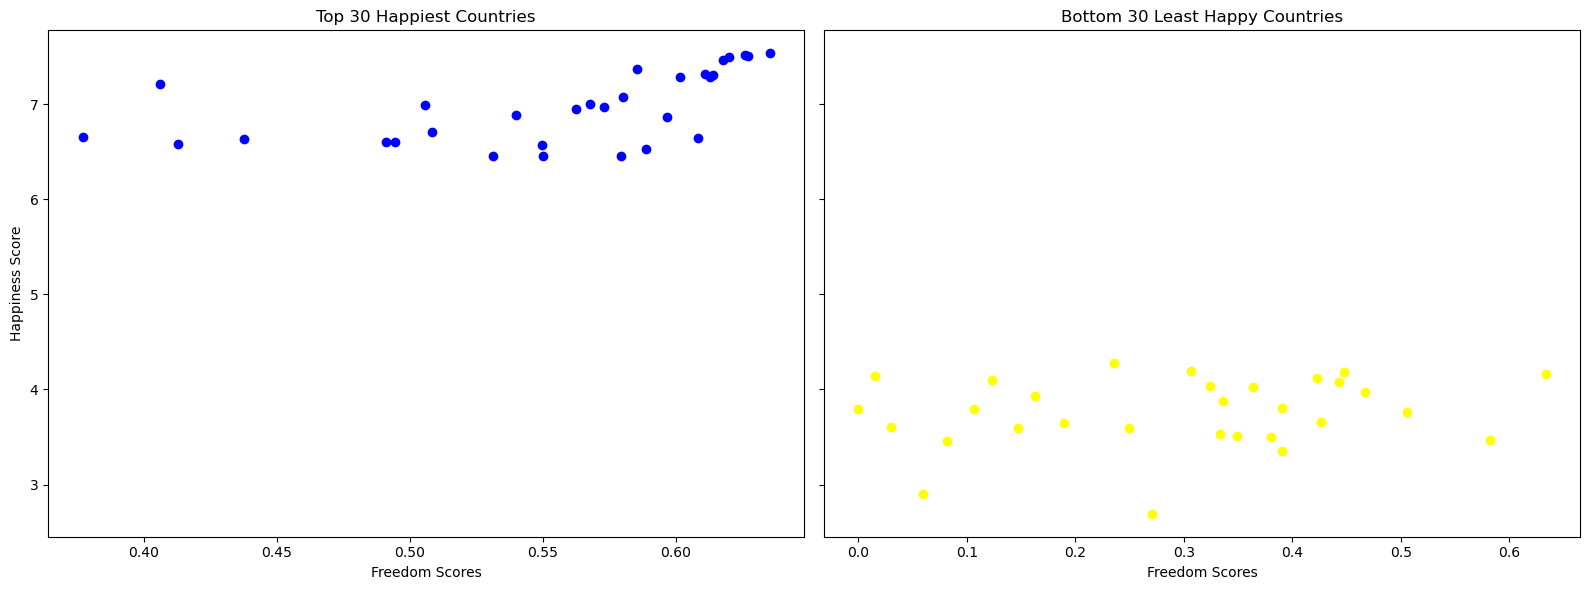

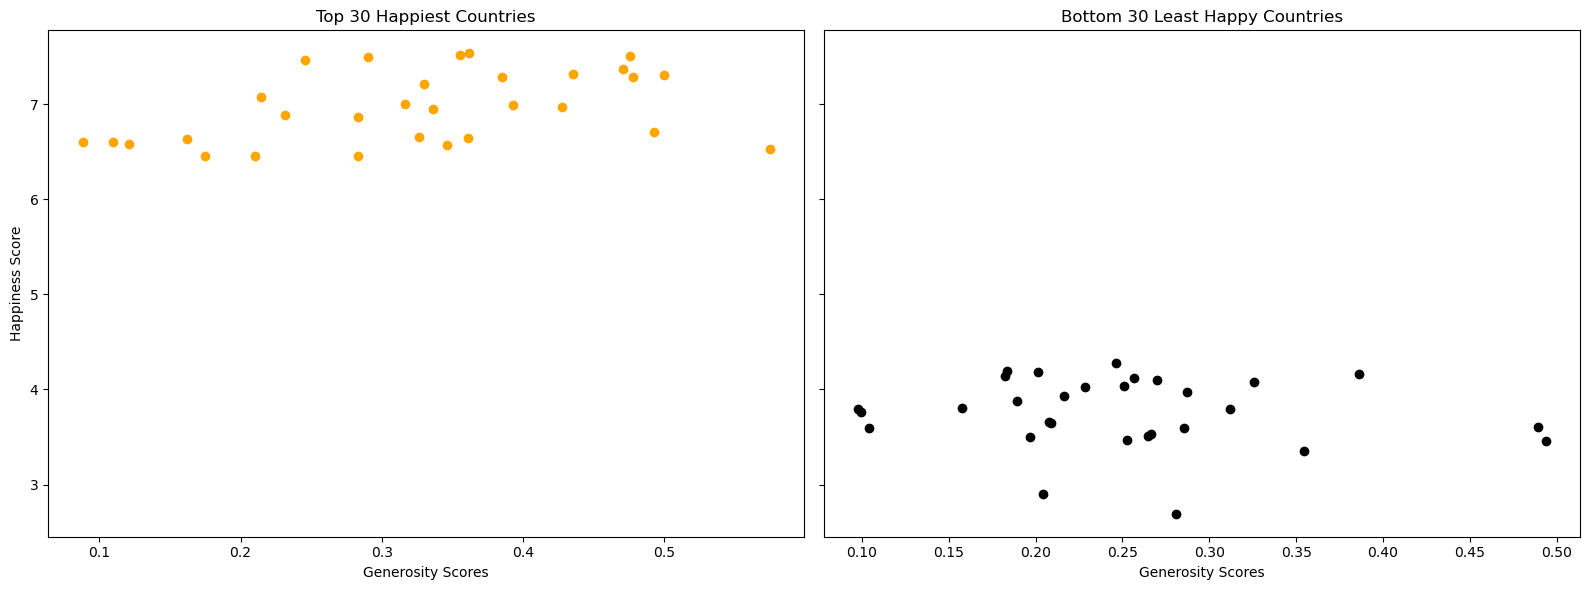

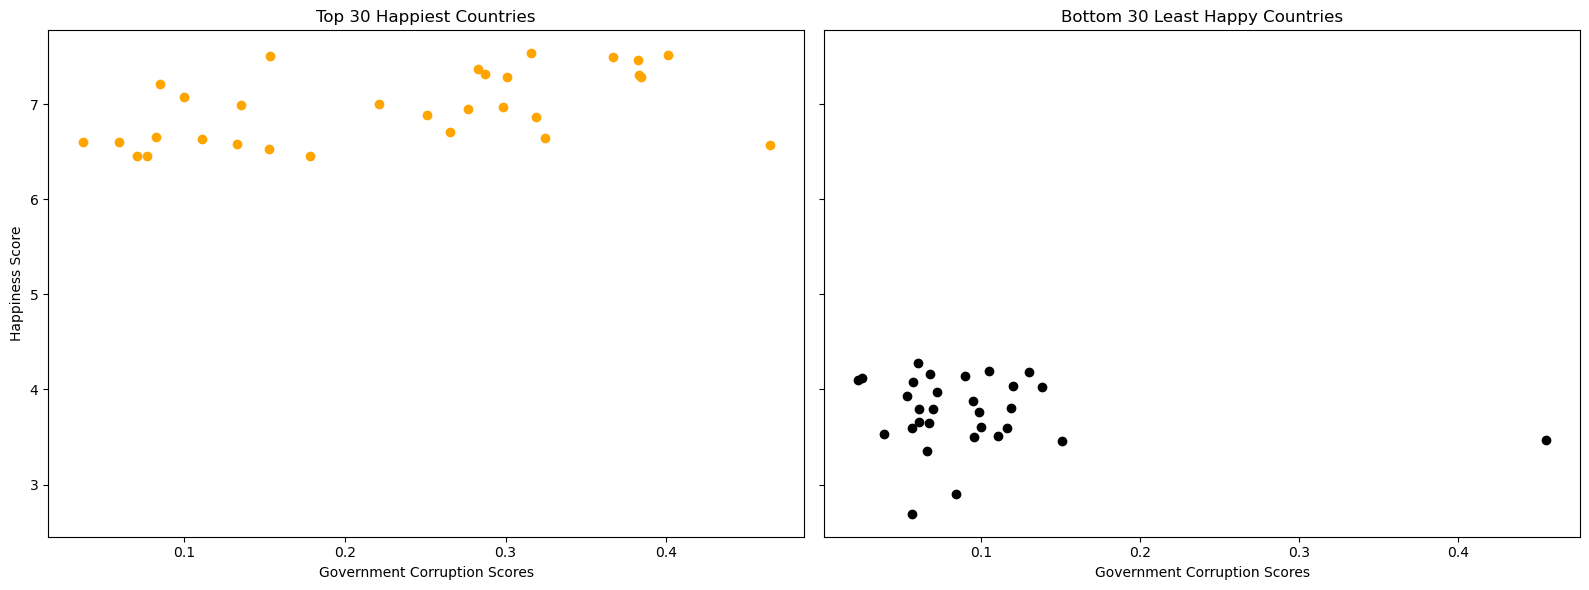

In [10]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Health..Life.Expectancy.'], top_30['Happiness.Score'], color='green')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('Health Life Expectancy ')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Health..Life.Expectancy.'], bottom_30['Happiness.Score'], color='red')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('Health Life Expectancy ')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Freedom'], top_30['Happiness.Score'], color='blue')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('Freedom Scores')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Freedom'], bottom_30['Happiness.Score'], color='yellow')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('Freedom Scores')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Generosity'], top_30['Happiness.Score'], color='orange')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('Generosity Scores')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Generosity'], bottom_30['Happiness.Score'], color='black')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('Generosity Scores')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Trust..Government.Corruption.'], top_30['Happiness.Score'], color='orange')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('Government Corruption Scores')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Trust..Government.Corruption.'], bottom_30['Happiness.Score'], color='black')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('Government Corruption Scores')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()

looking at all three of the scatter plots, it is pretty obvious that life expectancy is a pretty good indicator of HS, the greater the life expectancy, the happier the country tends to be[2]. Freedom, government corruption and Generosity scores don't necessarily seem to correlate to happiness.

some more scatter plots below analyzing the correlation between family scores and HS.

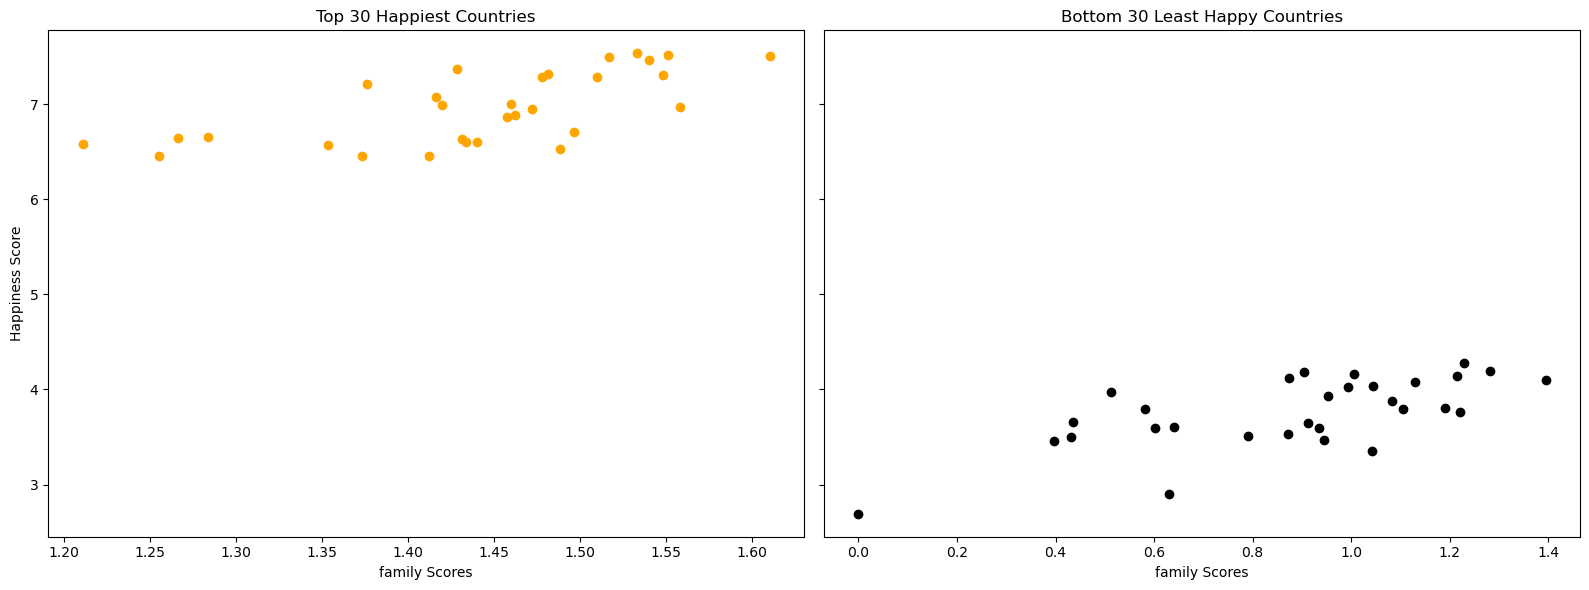

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(top_30['Family'], top_30['Happiness.Score'], color='orange')
ax1.set_title('Top 30 Happiest Countries')
ax1.set_xlabel('family Scores')
ax1.set_ylabel('Happiness Score')
ax2.scatter(bottom_30['Family'], bottom_30['Happiness.Score'], color='black')
ax2.set_title('Bottom 30 Least Happy Countries')
ax2.set_xlabel('family Scores')
ax1.set_ylabel('Happiness Score')
plt.tight_layout()
plt.show()

From the plot above, we can conclude that family scores have a pretty positive correlation with happiness scores, however, it doesn't seems to be such a strong factor when compared to other features such as GDP per capita and life expectancy. important to note that there does seem to be an outlier in the data in the bottom 30 countries plot, a country with a family score of 1.4 that has a really low HS.

the plots below replicate the HS vs GDP and HS vs life expectancy in a seaborn scatterplot, but this time with all of the data from the dataset.

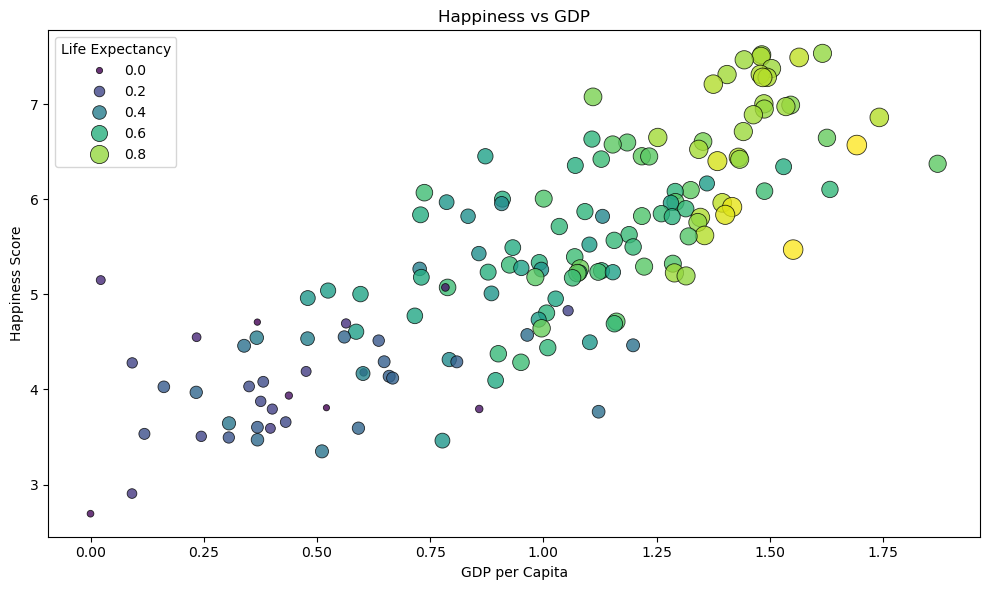

In [12]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data,
    x='Economy..GDP.per.Capita.',
    y='Happiness.Score',
    hue='Health..Life.Expectancy.',  
    palette='viridis',
    size='Health..Life.Expectancy.', 
    sizes=(20, 200),  
    alpha=0.8,
    edgecolor='black'
)

plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness vs GDP')
plt.legend(title='Life Expectancy',  loc='upper left')
plt.tight_layout()
plt.show()

As observed in the plot above, there is a positive linear correlation between life expectancy, GDP per capita and HS. as GDP per capita and life expectancy increases, happiness scores also tend to increase.

The code below calculates the linear relationship between HS, GDP per capita and Life expectancy using Sci-kit's linear regression model 

In [13]:
from sklearn.linear_model import LinearRegression


X = data[['Health..Life.Expectancy.']]
y = data['Happiness.Score']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
print("For every ten years increased in life expectancy, Happiness scores, on average increased by", slope*.1)

X2 = data[['Economy..GDP.per.Capita.']]
y2 = data['Happiness.Score']

model2 = LinearRegression()
model2.fit(X2, y2)

slope2 = model2.coef_[0]
print("For every .25 increased in GDP per capita, Happiness scores, on average increased by", slope2*.25)


For every ten years increased in life expectancy, Happiness scores, on average increased by 0.3731201709128991
For every .25 increased in GDP per capita, Happiness scores, on average increased by 0.5460462365874202


The code block above uses a linear regression model to compute the slope of best fit line of a scatter plot for its respective data. the results were,for every ten years increased in life expectancy, Happiness scores, on average increased by 0.3731201709128991. And,for every .25 increased in GDP per capita, Happiness scores, on average increased by 0.5460462365874202.

## Results

Overall, as discussed, GDP per capita and life expectancy seems to be the 2 major factors that affect a country's happinesss score. 

And to answer the research question, "Does living in certain parts of the world correlate to certain levels of happiness?", it is a mix of yes and no. the GDP and life expectancy of a country play a major role in a country's happiness score, which we analyzed in this project, doesn't vary greatly in close proximity. for example, take a region of africa that has a unremarkably low GDP per capita. odds are, and according to international economics, it's neighboring countries are most likely in the same GDP per capita bracket as that country. so yes, in that sense, geography matters. but geography doesn't matter in the sense that a country isn't necessarily going to have a Happiness score of X because it is located at latitude y and longitude Z. but answering the prompt in a cut and dry fashion, yes, living in certain parts of the world correlate to certain levels of happiness. 

## Discussion and Conclusion

I answered most of these questions in the sections above. however, I think this dataset was pretty easy to work with and I think it answered the prompt very well with supporting evidence. if I could have done something differently, I would have liked to have more features that directly correlate to HS so we could analyze which one has the most effect on it.

### References

[1] “Happiness during Wartime: Paradox or Pattern?” Voxukraine.org, 2025, voxukraine.org/en/happiness-during-wartime-paradox-or-pattern.

[2]Topor, David R. “If You Are Happy and You Know It… You May Live Longer.” Harvard Health Blog, 16 Oct. 2019, www.health.harvard.edu/blog/if-you-are-happy-and-you-know-it-you-may-live-longer-2019101618020.

[3]Stevenson, Kira. RELATIONSHIP between HAPPINESS and GDP per CAPITA GROWTH K I R a S T E v E N S O N. 2021.

